In [130]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 

from formation_channels import * 


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


### the following block of code just creates list for the SFRD model names as they occur in the csv files 

In [131]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
           
print('obtain index of the SFRD models that we want to highlight')
print('-----')
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
for ind_SFRD, SFRD in enumerate(MSSFRnameslistCSV):
    if SFRD in ['.0.0.0', '.2.3.1', '.3.1.2']:
        print(ind_SFRD, SFRD, (MSSFRnameslist[ind_SFRD]))
        print()
        
MSSFRheaderDict =  {'000':'.0.0.0', '111':'.1.1.1', '112':'.1.1.2', '113':'.1.1.3', '121':'.1.2.1', '122':'.1.2.2', '123':'.1.2.3', '131':'.1.3.1', '132':'.1.3.2', '133':'.1.3.3', '211':'.2.1.1',\
                    '212':'.2.1.2', '213':'.2.1.3', '221':'.2.2.1', '222':'.2.2.2', '223':'.2.2.3', '231':'.2.3.1', '232':'.2.3.2', '233':'.2.3.3', '311':'.3.1.1', '312':'.3.1.2', '313':'.3.1.3', '321':'.3.2.1', \
                    '322':'.3.2.2', '323':'.3.2.3', '331':'.3.3.1', '332':'.3.3.2', '333':'.3.3.3'}    


obtain index of the SFRD models that we want to highlight
-----
0 .0.0.0 000

16 .2.3.1 231

20 .3.1.2 312



In [132]:
def plotFormationChannelRates(whichRate='intrinsic', CSVdir='name'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,14), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    
    List_formationchannelOptions = ['All', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    
    ind_formationchannelOptions = [0,1,2,3,4,5]
    
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    

    for ind_t, DCOtype in enumerate(Types):
        axe = axes[ind_t]
        DCOname = DCOname_dict[DCOtype]

        for ind_c, whichChannel in enumerate(['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']):

            for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        
                stringgg =  'formation_channels'
                csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     

                df_name = csvPath
                df = pd.read_csv(df_name, index_col=0).T

                key_mssfr = MSSFRheaderDict[MSSFRname]
                rates_L = df[key_mssfr]



                if whichRate =='intrinsic':
                    ind_wanted = dictFormationChannelIndex[whichChannel]*2
                    rates = rates_L[ind_wanted::12][0:nModels]
                    totalrates = rates_L[0::12][0:nModels]
    #                     print(rates)
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'\textbf{fraction} $\,\mathcal{R}_{\rm{m}}^{{0}}$'



                elif whichRate=='observed':
                    ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                    rates = rates_L[ind_wanted::12][0:nModels]

                    totalrates = rates_L[1::12][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                    ylabel = r'\textbf{fraction} $\, \mathcal{R}_{\rm{det}}$'



                if MSSFRname=='231':
#                     COLOR=TypeColours[ind_t]#'teal'
                    zorder=10
                    label=MSSFRnameslist[ind_L] 
                    ls = MSSFRlinestyles[1]
#                     print('label=', label)
                    ALPHA=1
                elif MSSFRname=='312':
                    zorder=10
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[2]
#                     print('label=', label)
                    ALPHA=1
                else:
                    zorder=2
                    label=None    
                    ls = MSSFRlinestyles[0]
                    ALPHA=0.1


                ratesRatio = np.asarray(rates)/np.asarray(totalrates)
                ind_color = dictFormationChannelIndex[whichChannel]
                axe.plot(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], lw=2, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
                axe.scatter(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], s=50, label=None, zorder=zorder+1, alpha=1, linestyle=ls) #c=BPScolors




        xmin = -0.8
        xmax = nModels +0.5 # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


        for ll in [0.25, 0.5, 0.75]:
            axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=1.5, zorder=0)
            axe.text(17.5-0.04, ll, str(ll) +r'$\,$' , rotation = 0, fontsize = fs-4, color = 'gray', va='bottom', ha = 'right')#, weight = 'bold')
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )



#       # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '

        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#             axe.set_yscale('log')


        # set physical labels on bottom
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            ind_label = dictFormationChannelIndex[whichChannel]-1
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.98, 0.97, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', va='top', ha = 'right',transform=axe.transAxes)#, weight = 'bold')



        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-4, rotation=30)#, orientation=30)    
     

    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        plt.plot(x__,x__ , lw=5, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
        
    lgd = f.legend(fontsize=fs-6, ncol=3,\
                         bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.09)#2)
#     plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./FormationChannels_' + whichRate  + '.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()

    return

nModels=17


the observed fiducial rate for  BBH = 58.53267139023945
the observed fiducial rate for  BBH = 198.65282614030068
the observed fiducial rate for  BBH = 6.108615384306575
the observed fiducial rate for  BBH = 0.3327693693720939
the observed fiducial rate for  BBH = 15.249608598103135
the observed fiducial rate for  BHNS = 9.262391707408261
the observed fiducial rate for  BHNS = 0.4588423143858912
the observed fiducial rate for  BHNS = 0.4652898905617596
the observed fiducial rate for  BHNS = 0.03526468822924006
the observed fiducial rate for  BHNS = 0.6058069253699636
the observed fiducial rate for  BNS = 0.2186737882909168
the observed fiducial rate for  BNS = 0.0
the observed fiducial rate for  BNS = 8.3009978419845e-05
the observed fiducial rate for  BNS = 0.6479278397338294
the observed fiducial rate for  BNS = 0.004621634049860188


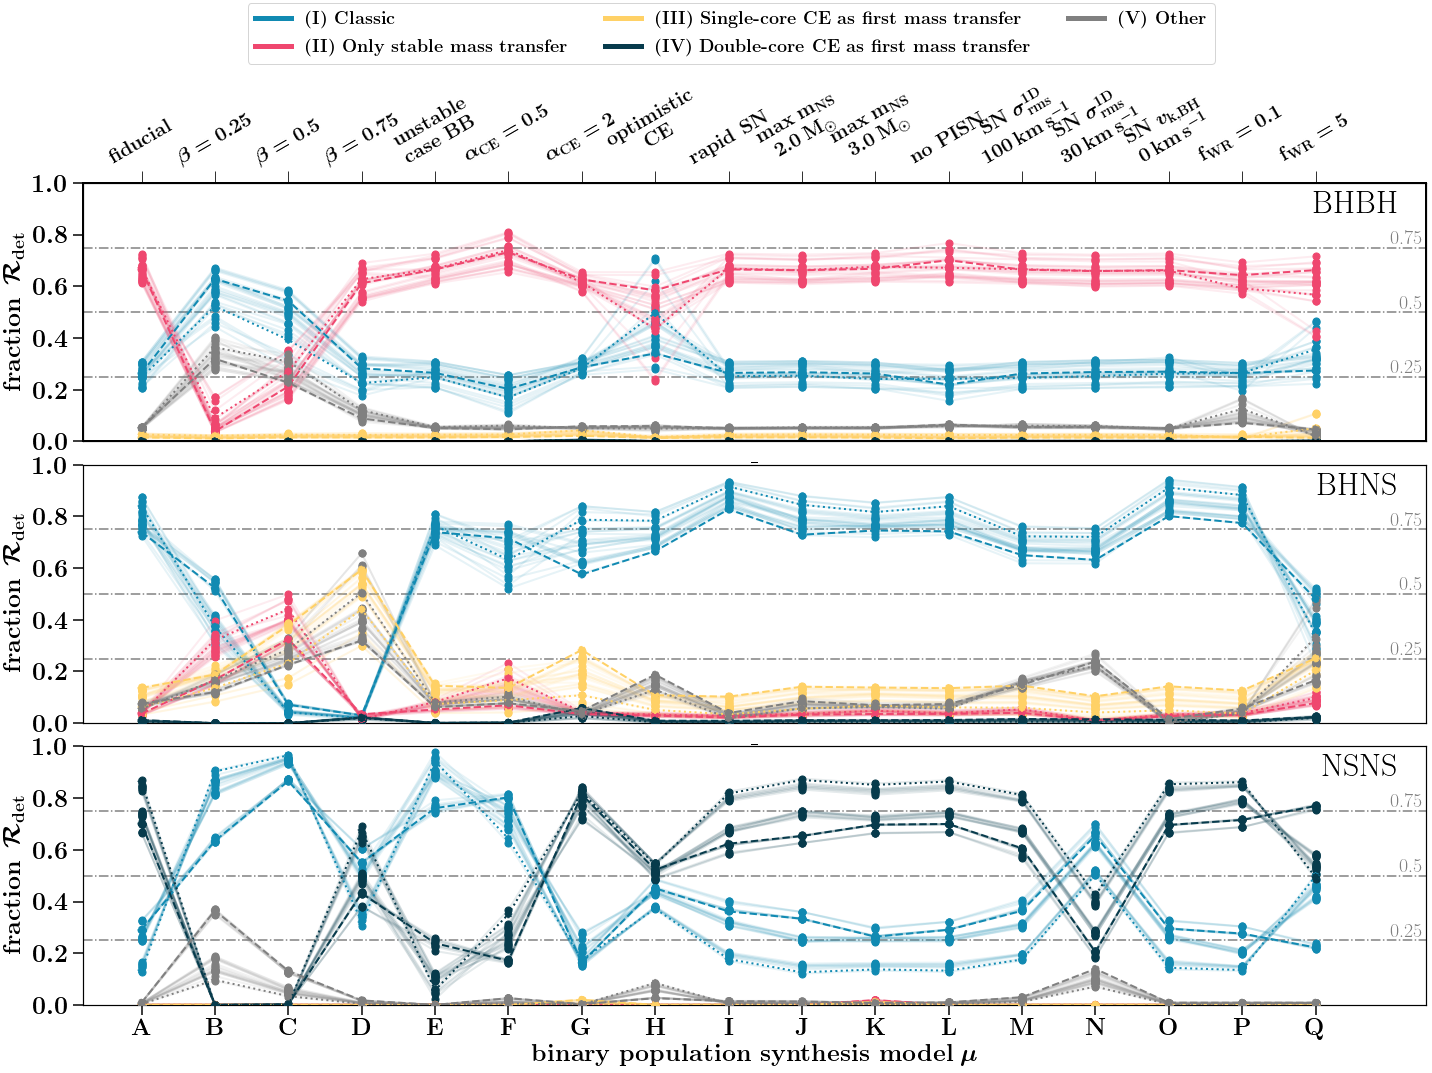

In [133]:
# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
ylims =[[0,1],[0,1],[0,1]]
plotFormationChannelRates(whichRate='observed', CSVdir=CSVdir)


In [134]:
def plotFormationChannelRates_vbars(whichRate='intrinsic', CSVdir='name'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,14), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    
    List_formationchannelOptions = ['All', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    
    ind_formationchannelOptions = [0,1,2,3,4,5]
    
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}

    dx = 0.4 #0.3
    dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) #+ ind_m
    dxlen = (2*dx)/len(MSSFRnameslist)
    

    for ind_t, DCOtype in enumerate(Types):
        print()
        axe = axes[ind_t]
        DCOname = DCOname_dict[DCOtype]
        
        
        stringgg =  'formation_channels'
        csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     

        df_name = csvPath
        df = pd.read_csv(df_name, index_col=0).T

        for ind_L, MSSFRname in enumerate(MSSFRnameslist):
            ratesRatio_low = np.zeros(nModels)
            ratesRatio     = np.zeros(nModels)
            

            x_positions_ = range(nModels)
            xx_ = dxrange[ind_L]
            x_positions = np.asarray(x_positions_) + xx_

                
            key_mssfr = MSSFRheaderDict[MSSFRname]
            rates_L = df[key_mssfr]
            
            if MSSFRname=='231':
                zorder=10
                label=MSSFRnameslist[ind_L] 
                ls = MSSFRlinestyles[1]
                ALPHA=1
            elif MSSFRname=='312':
                zorder=10
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[2]
                ALPHA=1
            else:
                zorder=2
                label=None    
                ls = MSSFRlinestyles[0]
                ALPHA=0.1
                
            for ind_c, whichChannel in enumerate(['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']):

                if whichRate =='intrinsic':
                    ind_wanted = dictFormationChannelIndex[whichChannel]*2
                    rates = rates_L[ind_wanted::12][0:nModels]
                    totalrates = rates_L[0::12][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'\textbf{fraction} $\,\mathcal{R}_{\rm{m}}^{{0}}$'



                elif whichRate=='observed':
                    ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                    rates = rates_L[ind_wanted::12][0:nModels]
                    totalrates = rates_L[1::12][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0])   
                    ylabel = r'\textbf{fraction} $\, \mathcal{R}_{\rm{det}}$'



                
                ratesRatio += np.asarray(rates)/np.asarray(totalrates)

                axe.bar(x_positions, height=(ratesRatio-ratesRatio_low),  bottom=ratesRatio_low, color=channelColorDict[whichChannel], alpha=1, \
                       width=dxlen, zorder=100)
                
                ratesRatio_low += np.asarray(rates)/np.asarray(totalrates)
                



        xmin = -0.8
        xmax = nModels +1. # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


        for ll in [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
            axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=0.9, zorder=0)
#             axe.text(18.5-0.04, ll, str(ll) +r'$\,$' , rotation = 0, fontsize = fs-4, color = 'gray', va='bottom', ha = 'right')#, weight = 'bold')
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )



#       # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '

        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#             axe.set_yscale('log')


        # set physical labels on bottom
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            ind_label = dictFormationChannelIndex[whichChannel]-1
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.99, 0.94, r'\textbf{%s}'%TypesLabels[ind_t] , rotation = 0, fontsize = fs+3, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')
        axe.text(0.99, 0.85, r'\textbf{detections}' , rotation = 0, fontsize = 17, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')




        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-6, rotation=30)#, orientation=30)    
     

    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
        
    lgd = f.legend(fontsize=fs-6, ncol=3,bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    
    
    draw_arrows(axes=axes)
    


    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.11)#2)
#     plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./FormationChannels_' + whichRate  + '_vbars.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()
    print()
    
    return

nModels=17


In [135]:
def draw_arrows(axes=None):

    # ARROWS:
    
#     ar_c = 'limegreen'
    ar_c = 'turquoise'
    ar_lw=4
    
    # BHBH
    axe =axes[0]
    # properties  arrow 
    strr = r"\textbf{Only Stable}" + '\n' + r'\textbf{mass transfer}' + '\n'   + r"\textbf{channel (II)}" + '\n'   + r"\textbf{dominates} "
    x_xy, y_xy = 16.1, 0.7
    x_xytext, y_xytext = 17.8, 0.3
    conn = "angle3,angleA=90,angleB=0"

    # draw arrow
    axe.annotate(strr,
      xy=(x_xy, y_xy), xycoords='data',
      xytext=(x_xytext, y_xytext), textcoords='data',
      size=15, va="center", ha="right",
      arrowprops=dict(arrowstyle="-|>",
                      connectionstyle=conn,
                      fc="k", ec=ar_c , lw=ar_lw), zorder=20000)    
    
    
    

    # BHNS 
    axe =axes[1]
    # properties  arrow 
    strr = r"\textbf{Classic CE}" + '\n' + r'\textbf{channel (I)}' + '\n' +r"\textbf{dominates} "
    x_xy, y_xy = 16.1, 0.14
    x_xytext, y_xytext = 17.9, 0.54
    conn = "angle,angleA=-90,angleB=180,rad=0"

    # draw arrow
    axe.annotate(strr,
      xy=(x_xy, y_xy), xycoords='data',
      xytext=(x_xytext, y_xytext), textcoords='data',
      size=15, va="center", ha="right",
      arrowprops=dict(arrowstyle="-|>",
                      connectionstyle=conn,
                      fc="k", ec=ar_c , lw=ar_lw), zorder=20000)
    
    
    
    # NSNS 
    axe =axes[2]
    # properties  arrow 
    strr = r"\textbf{Double-core CE}" + '\n' + r'\textbf{channel (IV)}' + '\n' +r"\textbf{dominates} "
    x_xy, y_xy = 16.1, 0.7
    x_xytext, y_xytext = 17.9, 0.3
    conn = "angle3,angleA=90,angleB=0"

    # draw arrow
    axe.annotate(strr,
      xy=(x_xy, y_xy), xycoords='data',
      xytext=(x_xytext, y_xytext), textcoords='data',
      size=15, va="center", ha="right",
      arrowprops=dict(arrowstyle="-|>",
                      connectionstyle=conn,
                      fc="k", ec=ar_c , lw=ar_lw), zorder=20000)
    
    


the observed fiducial rate for  BBH = 58.53267139023945
the observed fiducial rate for  BBH = 198.65282614030068
the observed fiducial rate for  BBH = 6.108615384306575
the observed fiducial rate for  BBH = 0.3327693693720939
the observed fiducial rate for  BBH = 15.249608598103135

the observed fiducial rate for  BHNS = 9.262391707408261
the observed fiducial rate for  BHNS = 0.4588423143858912
the observed fiducial rate for  BHNS = 0.4652898905617596
the observed fiducial rate for  BHNS = 0.03526468822924006
the observed fiducial rate for  BHNS = 0.6058069253699636

the observed fiducial rate for  BNS = 0.2186737882909168
the observed fiducial rate for  BNS = 0.0
the observed fiducial rate for  BNS = 8.3009978419845e-05
the observed fiducial rate for  BNS = 0.6479278397338294
the observed fiducial rate for  BNS = 0.004621634049860188


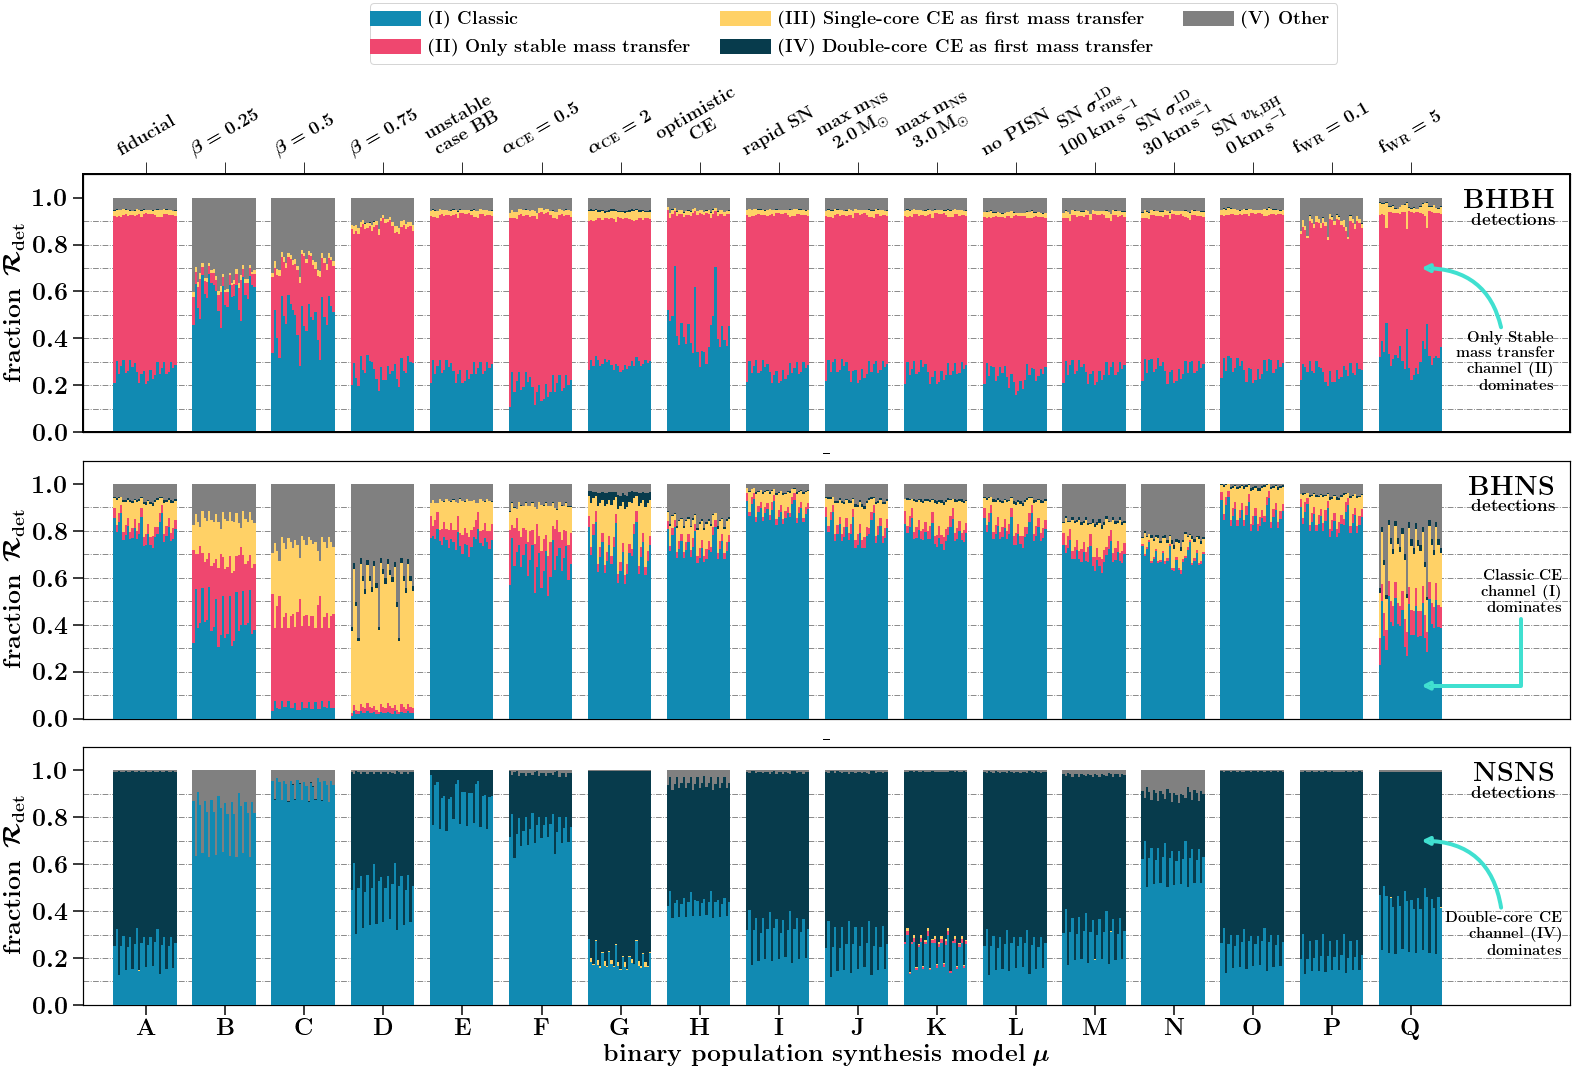

In [219]:
# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
ylims =[[0,1.1],[0,1.1],[0,1.1]]
plotFormationChannelRates_vbars(whichRate='observed', CSVdir=CSVdir)


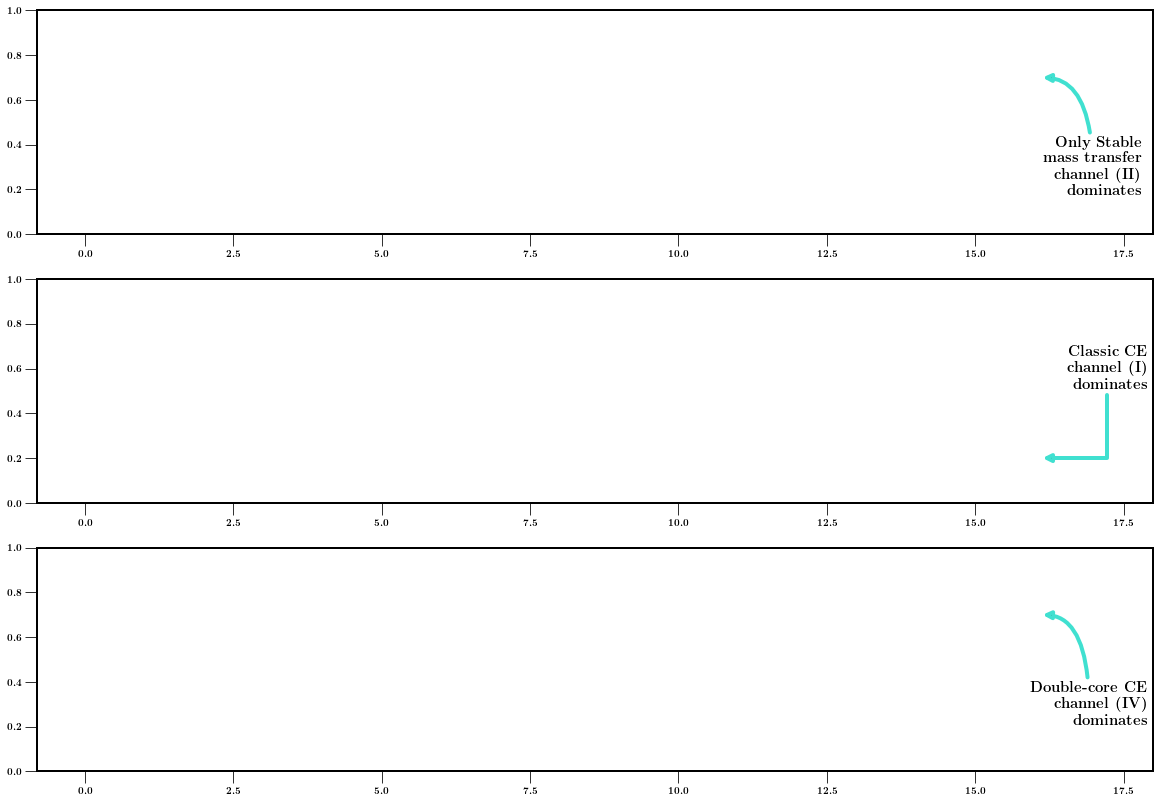

In [117]:
ncols=1
nrows=3
f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,14), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


for ii in range(3):
    axe = axes[ii]
    xmin = -0.8
    xmax = nModels +1. # change to len(df.T)
    axe.set_xlim(xmin, xmax)
    axe.set_ylim(0,1)
    
    
draw_arrows(axes=axes)


plt.show()

# Plot hist_bars with errorbars median & all uncertainty 

In [187]:
mssfr_list = np.zeros((28,5))

mssfr_list[0] = [1,1,1,1,1]



mssfr_mean = np.mean(mssfr_list, axis=0)
mssfr_max = np.max(mssfr_list, axis=0)
mssfr_min = np.min(mssfr_list, axis=0)

mssfr_median = np.median(mssfr_list, axis=0)
print(mssfr_median)




yy = [mssfr_median-mssfr_max, mssfr_median-mssfr_max]

print(np.shape(yy))

[0. 0. 0. 0. 0.]
(2, 5)


In [208]:
def plotFormationChannelRates_vbar_errorbar(whichRate='intrinsic', CSVdir='name'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,14), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    
    List_formationchannelOptions = ['All', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    
    ind_formationchannelOptions = [0,1,2,3,4,5]
    
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}

    dx = 0.35 #0.3
    dxrange = np.linspace(-dx, +dx, 5+1) #+ ind_m # 10 5*2 formation channels 
    dxlen = (2*dx)/5 
    

    for ind_t, DCOtype in enumerate(Types):
        print()
        axe = axes[ind_t]
        DCOname = DCOname_dict[DCOtype]
        
        
        stringgg =  'formation_channels'
        csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     

        df_name = csvPath
        df = pd.read_csv(df_name, index_col=0).T
        
        for ind_c, whichChannel in enumerate(['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']):
            
            mssfr_list = np.zeros((len(MSSFRnameslist),len(BPSnameslist)))
            
            x_positions_ = range(nModels)
            xx_ = dxrange[ind_c]
            x_positions = np.asarray(x_positions_) + xx_    
            
            
            for ind_L, MSSFRname in enumerate(MSSFRnameslist):
#                 ratesRatio_low = np.zeros(nModels)
#                 ratesRatio     = np.zeros(nModels)





                key_mssfr = MSSFRheaderDict[MSSFRname]
                rates_L = df[key_mssfr]

                if MSSFRname=='231':
                    zorder=10
                    label=MSSFRnameslist[ind_L] 
                    ls = MSSFRlinestyles[1]
                    ALPHA=1
                elif MSSFRname=='312':
                    zorder=10
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[2]
                    ALPHA=1
                else:
                    zorder=2
                    label=None    
                    ls = MSSFRlinestyles[0]
                    ALPHA=0.1



                if whichRate =='intrinsic':
                    ind_wanted = dictFormationChannelIndex[whichChannel]*2
                    rates = rates_L[ind_wanted::12][0:nModels]
                    totalrates = rates_L[0::12][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'\textbf{fraction} $\,\mathcal{R}_{\rm{m}}^{{0}}$'



                elif whichRate=='observed':
                    ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                    rates = rates_L[ind_wanted::12][0:nModels]
                    totalrates = rates_L[1::12][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0])   
                    ylabel = r'\textbf{fraction} $\, \mathcal{R}_{\rm{det}}$'

                    

                
                ratesRatio = np.asarray(rates)/np.asarray(totalrates)
                mssfr_list[ind_L] = ratesRatio
                
                
                
            mssfr_mean = np.mean(mssfr_list, axis=0)
            mssfr_max = np.max(mssfr_list, axis=0)
            mssfr_min = np.min(mssfr_list, axis=0)                
            
            axe.bar(x_positions, height=(mssfr_mean),  bottom=np.ones_like(mssfr_mean)*0.001, color=channelColorDict[whichChannel], alpha=1, \
                   width=dxlen, zorder=100)
            yerr_ = [mssfr_max-mssfr_mean, mssfr_mean-mssfr_min]
            axe.errorbar(x=x_positions, y=(mssfr_mean),  yerr=yerr_, color='turquoise', mec='white', mfc='k', alpha=1, zorder=200, linestyle='none', capsize=4)

#             ratesRatio_low += np.asarray(rates)/np.asarray(totalrates)
                



        xmin = -0.8
        xmax = nModels +1. # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


#         for ll in [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
#             axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=0.9, zorder=0)
# #             axe.text(18.5-0.04, ll, str(ll) +r'$\,$' , rotation = 0, fontsize = fs-4, color = 'gray', va='bottom', ha = 'right')#, weight = 'bold')
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
#         axe.set_yscale('log')


#       # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '

        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#             axe.set_yscale('log')


        # set physical labels on bottom
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            ind_label = dictFormationChannelIndex[whichChannel]-1
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.99, 0.94, r'\textbf{%s}'%TypesLabels[ind_t] , rotation = 0, fontsize = fs+3, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')
        axe.text(0.99, 0.85, r'\textbf{detections}' , rotation = 0, fontsize = 17, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')




        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-6, rotation=30)#, orientation=30)    
     

    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
        
    lgd = f.legend(fontsize=fs-6, ncol=3,bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    
    
#     draw_arrows(axes=axes)
    


    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.11)#2)
#     plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./FormationChannels_' + whichRate  + '_vbar_errorbar_notlog.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()
    print()
    
    return

nModels=17



the observed fiducial rate for  BBH = 58.53267139023945
the observed fiducial rate for  BBH = 198.65282614030068
the observed fiducial rate for  BBH = 6.108615384306575
the observed fiducial rate for  BBH = 0.3327693693720939
the observed fiducial rate for  BBH = 15.249608598103135

the observed fiducial rate for  BHNS = 9.262391707408261
the observed fiducial rate for  BHNS = 0.4588423143858912
the observed fiducial rate for  BHNS = 0.4652898905617596
the observed fiducial rate for  BHNS = 0.03526468822924006
the observed fiducial rate for  BHNS = 0.6058069253699636

the observed fiducial rate for  BNS = 0.2186737882909168
the observed fiducial rate for  BNS = 0.0
the observed fiducial rate for  BNS = 8.3009978419845e-05
the observed fiducial rate for  BNS = 0.6479278397338294
the observed fiducial rate for  BNS = 0.004621634049860188


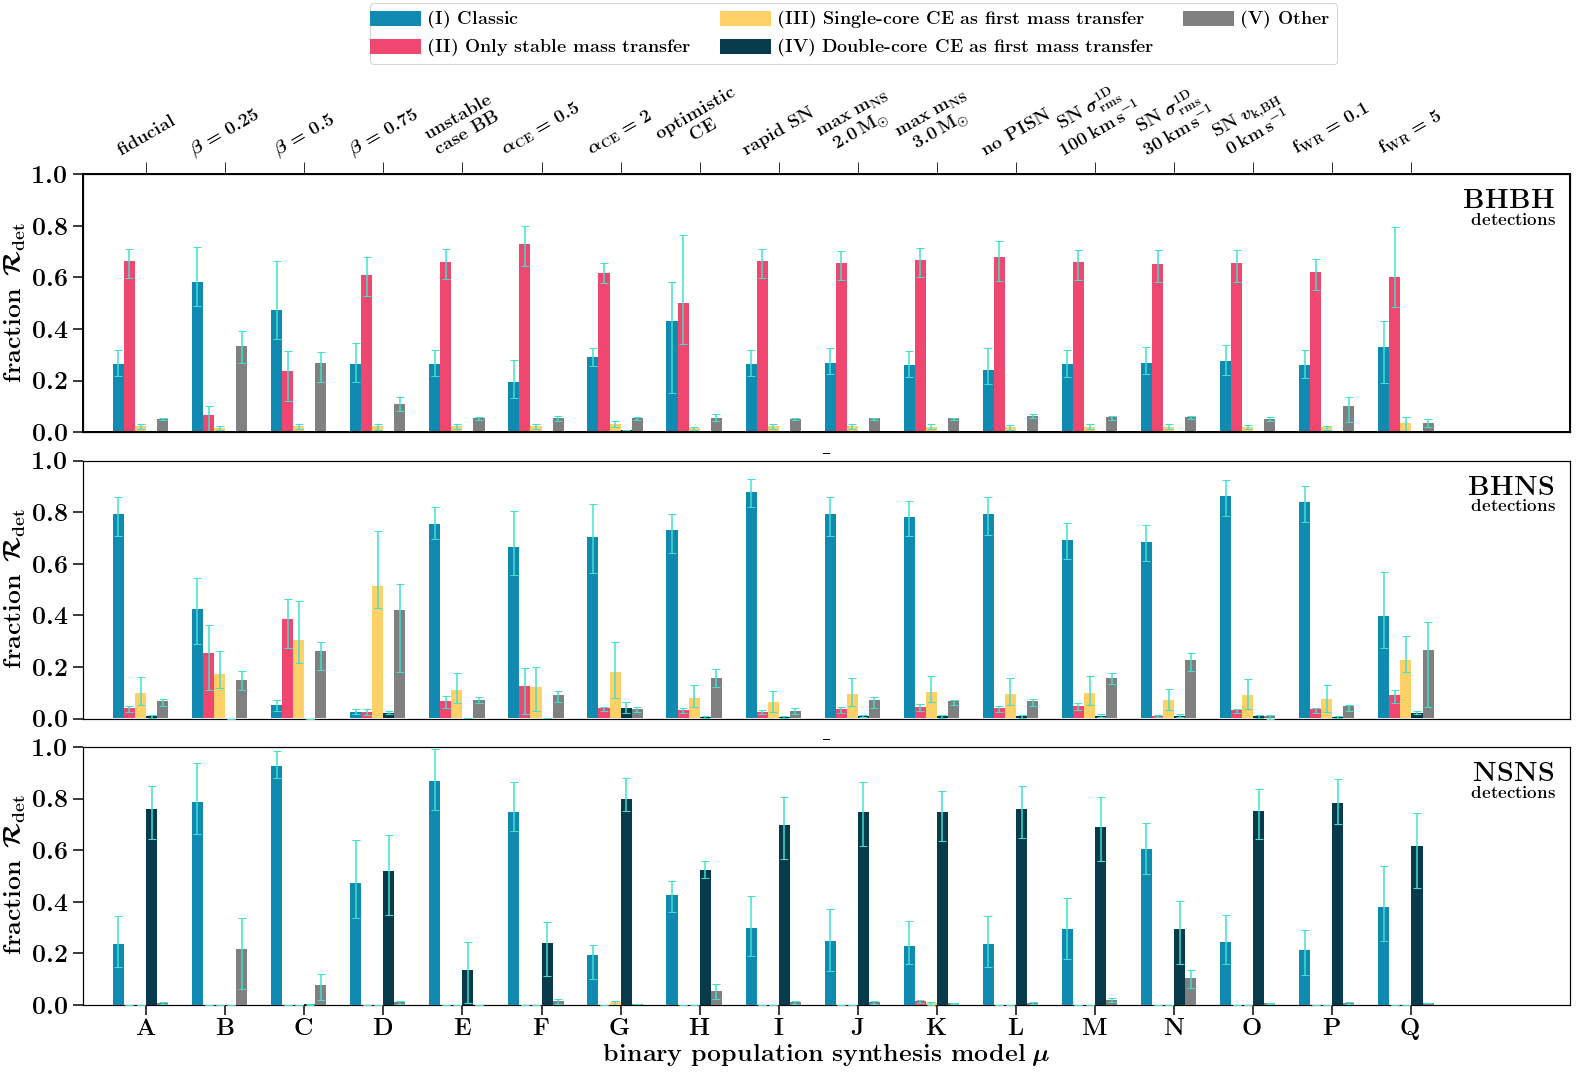

In [209]:
# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
ylims =[[0.01,1],[0.01,1],[0.01,1]]
ylims =[[0.,1],[0.,1],[0.,1]]
plotFormationChannelRates_vbar_errorbar(whichRate='observed', CSVdir=CSVdir)


In [215]:
def plotFormationChannelRates_vbar_errorbar_big(whichRate='intrinsic', CSVdir='name'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,14), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    
    List_formationchannelOptions = ['All', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    
    ind_formationchannelOptions = [0,1,2,3,4,5]
    
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}

    dx = 0.35 #0.3
    dxrange = np.linspace(-dx, +dx, 1+1) #+ ind_m # 10 5*2 formation channels 
    dxlen = (2*dx) 
    

    for ind_t, DCOtype in enumerate(Types):
        print()
        axe = axes[ind_t]
        DCOname = DCOname_dict[DCOtype]
        
        
        stringgg =  'formation_channels'
        csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     

        df_name = csvPath
        df = pd.read_csv(df_name, index_col=0).T
        
        bottom_mean = np.zeros(len(BPSnameslist))
        x_positions = range(nModels)
#         xx_ = dxrange[ind_c]
#         x_positions = np.asarray(x_positions_) + xx_   
        for ind_c, whichChannel in enumerate(['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']):
            
            mssfr_list = np.zeros((len(MSSFRnameslist),len(BPSnameslist)))
            
  
            
            
            for ind_L, MSSFRname in enumerate(MSSFRnameslist):
#                 ratesRatio_low = np.zeros(nModels)
#                 ratesRatio     = np.zeros(nModels)





                key_mssfr = MSSFRheaderDict[MSSFRname]
                rates_L = df[key_mssfr]

                if MSSFRname=='231':
                    zorder=10
                    label=MSSFRnameslist[ind_L] 
                    ls = MSSFRlinestyles[1]
                    ALPHA=1
                elif MSSFRname=='312':
                    zorder=10
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[2]
                    ALPHA=1
                else:
                    zorder=2
                    label=None    
                    ls = MSSFRlinestyles[0]
                    ALPHA=0.1



                if whichRate =='intrinsic':
                    ind_wanted = dictFormationChannelIndex[whichChannel]*2
                    rates = rates_L[ind_wanted::12][0:nModels]
                    totalrates = rates_L[0::12][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'\textbf{fraction} $\,\mathcal{R}_{\rm{m}}^{{0}}$'



                elif whichRate=='observed':
                    ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                    rates = rates_L[ind_wanted::12][0:nModels]
                    totalrates = rates_L[1::12][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0])   
                    ylabel = r'\textbf{fraction} $\, \mathcal{R}_{\rm{det}}$'

                    

                
                ratesRatio = np.asarray(rates)/np.asarray(totalrates)
                mssfr_list[ind_L] = ratesRatio
                
                
                
            mssfr_mean = np.mean(mssfr_list, axis=0)
            mssfr_max = np.max(mssfr_list, axis=0)
            mssfr_min = np.min(mssfr_list, axis=0)                
            
            axe.bar(x_positions, height=(mssfr_mean),  bottom=bottom_mean, color=channelColorDict[whichChannel], alpha=1, \
                   width=dxlen, zorder=100)
            yerr_ = [mssfr_max-mssfr_mean, mssfr_mean-mssfr_min]
            axe.errorbar(x=x_positions, y=(mssfr_mean)+bottom_mean,  yerr=yerr_, color='turquoise', mec='white', mfc='k', alpha=1, zorder=200, linestyle='none', capsize=4)
            bottom_mean+=mssfr_mean
#             ratesRatio_low += np.asarray(rates)/np.asarray(totalrates)
                



        xmin = -0.8
        xmax = nModels +1. # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


#         for ll in [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
#             axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=0.9, zorder=0)
# #             axe.text(18.5-0.04, ll, str(ll) +r'$\,$' , rotation = 0, fontsize = fs-4, color = 'gray', va='bottom', ha = 'right')#, weight = 'bold')
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
#         axe.set_yscale('log')


#       # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '

        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#             axe.set_yscale('log')


        # set physical labels on bottom
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            ind_label = dictFormationChannelIndex[whichChannel]-1
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.99, 0.94, r'\textbf{%s}'%TypesLabels[ind_t] , rotation = 0, fontsize = fs+3, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')
        axe.text(0.99, 0.85, r'\textbf{detections}' , rotation = 0, fontsize = 17, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')




        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-6, rotation=30)#, orientation=30)    
     

    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
        
    lgd = f.legend(fontsize=fs-6, ncol=3,bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    
    
#     draw_arrows(axes=axes)
    


    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.11)#2)
#     plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./FormationChannels_' + whichRate  + '_vbar_errorbar_big.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()
    print()
    
    return

nModels=17



the observed fiducial rate for  BBH = 58.53267139023945
the observed fiducial rate for  BBH = 198.65282614030068
the observed fiducial rate for  BBH = 6.108615384306575
the observed fiducial rate for  BBH = 0.3327693693720939
the observed fiducial rate for  BBH = 15.249608598103135

the observed fiducial rate for  BHNS = 9.262391707408261
the observed fiducial rate for  BHNS = 0.4588423143858912
the observed fiducial rate for  BHNS = 0.4652898905617596
the observed fiducial rate for  BHNS = 0.03526468822924006
the observed fiducial rate for  BHNS = 0.6058069253699636

the observed fiducial rate for  BNS = 0.2186737882909168
the observed fiducial rate for  BNS = 0.0
the observed fiducial rate for  BNS = 8.3009978419845e-05
the observed fiducial rate for  BNS = 0.6479278397338294
the observed fiducial rate for  BNS = 0.004621634049860188


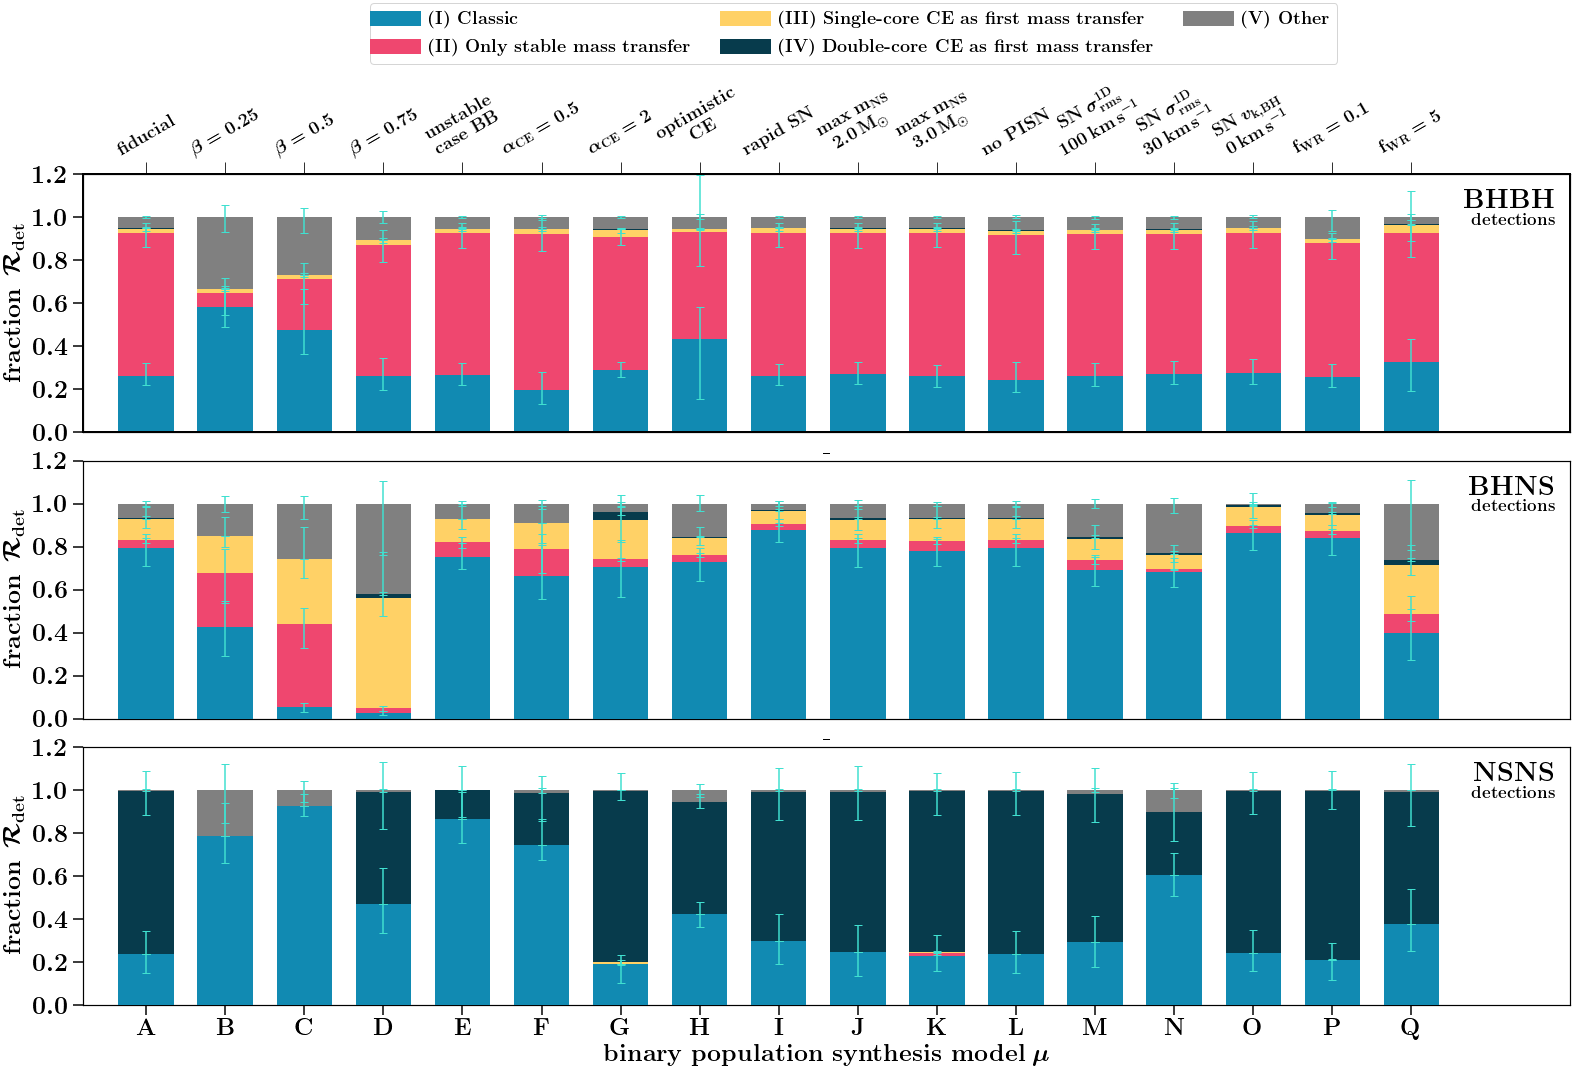

In [218]:
# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'

ylims =[[0.,1.2],[0.,1.2],[0.,1.2]]
plotFormationChannelRates_vbar_errorbar_big(whichRate='observed', CSVdir=CSVdir)
    